In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# F_orig = np.load('F_orig.npy')[::-1, :]
# F0_orig = np.load('F0_orig.npy')[::-1, :]
# F_orig = np.load('F_long.npy')[::-1, :]
# F0_orig = np.load('F0_long.npy')[::-1, :]
# F0_comp_orig = np.load('F0_comp_orig.npy')[::-1, :]
# F0m_comp_orig = np.load('F0m_comp_orig.npy')[::-1, :]
# F0_test = np.load('F0_test.npy')[::-1, :]
# F0m_test = np.load('F0m_test.npy')[::-1, :]
F_orig = np.load('F_long.npy')
F_input = np.load('F_input.npy')
F0_orig = np.load('F0_long.npy')
F0_comp_orig = np.load('F0_comp_orig.npy')
F0m_comp_orig = np.load('F0m_comp_orig.npy')
F_comp_aligned = np.load('F_comp_aligned.npy')
imin_comp_orig = np.load('imin_comp_orig.npy')

F0_test = np.load('F0_test.npy')
F0m_test = np.load('F0m_test.npy')
F_test_aligned = np.load('F_test_aligned.npy')

imin_test = np.load('imin_test.npy')

In [2]:
F_orig.shape

(1534, 20, 4942)

In [3]:
imin_test.shape

(4942, 9)

In [4]:
nblocks=5
nybins = F_orig.shape[0]
yl = math.floor(nybins/nblocks)-1
ifirst = np.round(np.linspace(0, nybins - yl, 2*nblocks-1))
ilast  = ifirst + yl
nblocks = len(ifirst)

In [5]:
ifirst

array([   0.,  154.,  307.,  461.,  614.,  768.,  922., 1075., 1229.])

In [6]:
ilast

array([ 305.,  459.,  612.,  766.,  919., 1073., 1227., 1380., 1534.])

In [7]:
def plot_drift_fingerprints(F, F_shifted, F0, F0m, N=25, output_dir=None, depths_interval=None):
    
#     depths = np.linspace(0, 7660, num=F.shape[0])
    
#     if depths_interval is not None:
#         print(f"select depths at {depths_interval}")
#         depths_i = np.array([
#             i for i, d in enumerate(depths)
#             if d>=depths_interval[0] and d <= depths_interval[1]
#         ])
#         F = F[depths_i, :, :]
#         F0 = F0[depths_i, :]
#         depths = depths[depths_i]
    
    step = int(F.shape[2]/N)

    F_sub = F[:,:,::step]
    F_shifted_sub = F_shifted[:,:,::step]

    n = F_sub.shape[2]

#     plt.rcParams['figure.figsize'] = (10,20)
    fig = plt.Figure(figsize=(30,20))
    grid = fig.add_gridspec(1, 2*n+4, wspace=0.0, hspace=0.0)

    ax = plt.subplot(grid[0,0])
#     plt.imshow(F0, aspect='auto', extent=[0, 20, depths.min(), depths.max()])
    plt.imshow(F0, aspect='auto')
    plt.title('F0 (target)', rotation=90)
    ax = plt.subplot(grid[0,1])
    plt.imshow(F0m, aspect='auto')
    plt.title('F0m (computed)', rotation=90)
    ax = plt.subplot(grid[0,2])
    plt.imshow(np.mean(F - np.mean(F, axis=0, keepdims=True), axis=2), aspect='auto')
    plt.title('F0m (1)', rotation=90)
    ax = plt.subplot(grid[0,3])
    plt.imshow(np.mean(F_shifted - np.mean(F_shifted, axis=0, keepdims=True), axis=2), aspect='auto')
    plt.title('F0m (2)', rotation=90)

    for i in range(n):
        ax = plt.subplot(grid[0,i+4])
        plt.imshow(F_sub[:,:,i], aspect='auto', cmap='viridis')
        ax.get_yaxis().set_visible(False)
        plt.title(f'{i*step}', rotation=90)

        ax = plt.subplot(grid[0,n+i+4])
        plt.imshow(F_shifted_sub[:,:,i], aspect='auto', cmap='viridis')
        ax.get_yaxis().set_visible(False)
        plt.title(f"{i*step}", rotation=90)

#         ax = plt.subplot(grid[1, i+1])
#         state = get_state(hyp, t)
#         ax.set_facecolor(state_colors[state])

#     ax = plt.subplot(grid[2, 1:])
#     for i in range(drift_sub.shape[1]):
#         plt.plot(times_sub, drift_sub[:, i], alpha=0.7, linewidth=1)
    
#     hypcols = {state: state_colors[state] for state in hyp.state.unique()}
#     plt.suptitle(f'Fingerprints: {subject}, {condition}, {sorting_condition}.\n{hypcols}')
    
    if output_dir is not None:
        Path(output_dir).mkdir(exist_ok=True)
        filename = f'drift_fingerprint_{subject}_{condition}_{sorting_condition}.png'
        print(f'save {filename}')
        fig.savefig(Path(output_dir)/filename)
    
    return fig

Text(0.5, 1.0, 'F0m_non-rigid-target')

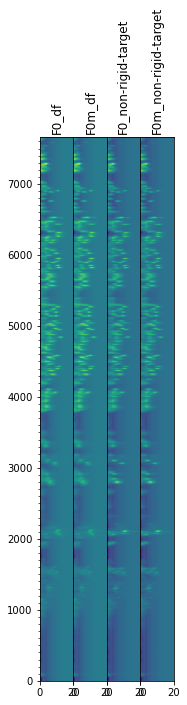

In [8]:
plt.rcParams['figure.figsize'] = [3, 10]

fig = plt.Figure()
grid = fig.add_gridspec(1, 5, wspace=0.0, hspace=0.0)

ax = plt.subplot(grid[0,0])
plt.imshow(F0_orig, aspect='auto', extent=[0, 20, 0, 7660])
plt.title('F0_df', rotation=90)
ax.yaxis.set_minor_locator(plt.MultipleLocator(100))

ax = plt.subplot(grid[0,1])
plt.imshow(F0m_comp_orig, aspect='auto', extent=[0, 20, 0, 7660])
ax.get_yaxis().set_visible(False)
plt.title('F0m_df', rotation=90)
ax = plt.subplot(grid[0,2])
plt.imshow(F0_test, aspect='auto', extent=[0, 20, 0, 7660])
ax.get_yaxis().set_visible(False)
plt.title('F0_non-rigid-target', rotation=90)
ax = plt.subplot(grid[0,3])
plt.imshow(F0m_test, aspect='auto', extent=[0, 20, 0, 7660])
ax.get_yaxis().set_visible(False)
plt.title('F0m_non-rigid-target', rotation=90)
# ax = plt.subplot(grid[0,1])
# plt.imshow(F0_comp_orig, aspect='auto', extent=[0, 20, 0, 7660])
# plt.title('F0_df')
# ax = plt.subplot(grid[0,2])
# plt.imshow(F0m_comp_orig, aspect='auto', extent=[0, 20, 0, 7660])
# plt.title('F0m_df')
# ax = plt.subplot(grid[0,3])
# plt.imshow(F0_test, aspect='auto', extent=[0, 20, 0, 7660])
# plt.title('F0_test')
# ax = plt.subplot(grid[0,4])
# plt.imshow(F0m_test, aspect='auto', extent=[0, 20, 0, 7660])
# plt.title('F0m_test')


In [9]:
# Manually shift
F_shifted_test = F_input.copy()

for j in range(imin_test.shape[1]):
    block_i = np.arange(ifirst[j], ilast[j], dtype=int)
    for t in range(F_shifted_test.shape[2]):
        F_shifted_test[block_i,:,t] = np.roll(F_input[block_i,:,t], int(imin_test[t, j]), axis=0)


In [34]:
F_shifted_test_demeaned = F_shifted_test - np.mean(F_shifted_test, axis=0, keepdims=True)

<Figure size 2160x1440 with 0 Axes>

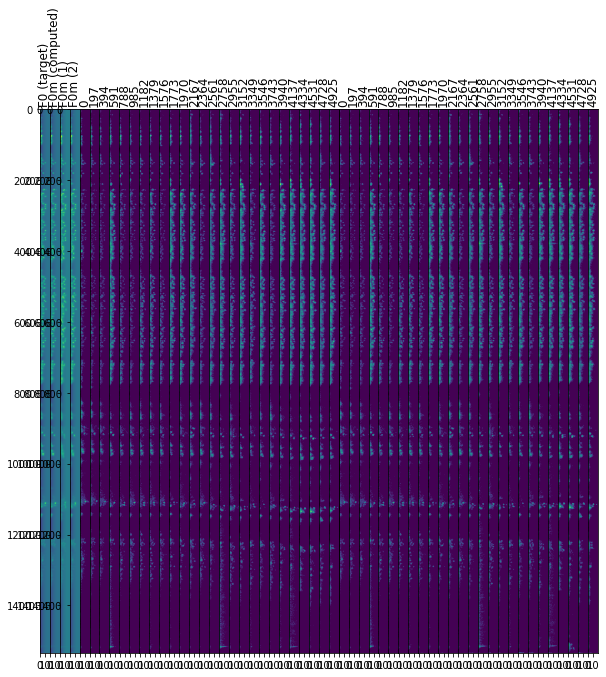

In [36]:
plt.rcParams['figure.figsize'] = [10, 10]

plot_drift_fingerprints(F_input, F_shifted_test, F0_test , F0m_test)

<Figure size 2160x1440 with 0 Axes>

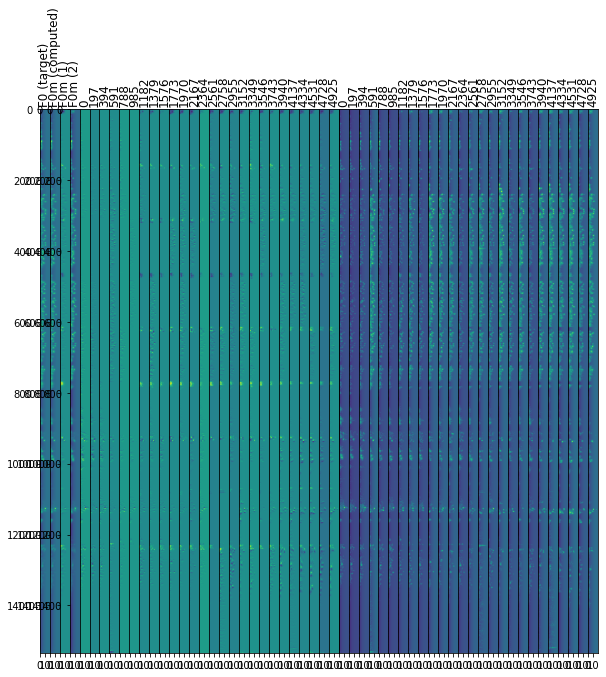

In [407]:
plot_drift_fingerprints(F_test_aligned-F_shifted_test_demeaned, F_shifted_test_demeaned, F0_test , F0m_test)

<Figure size 2160x1440 with 0 Axes>

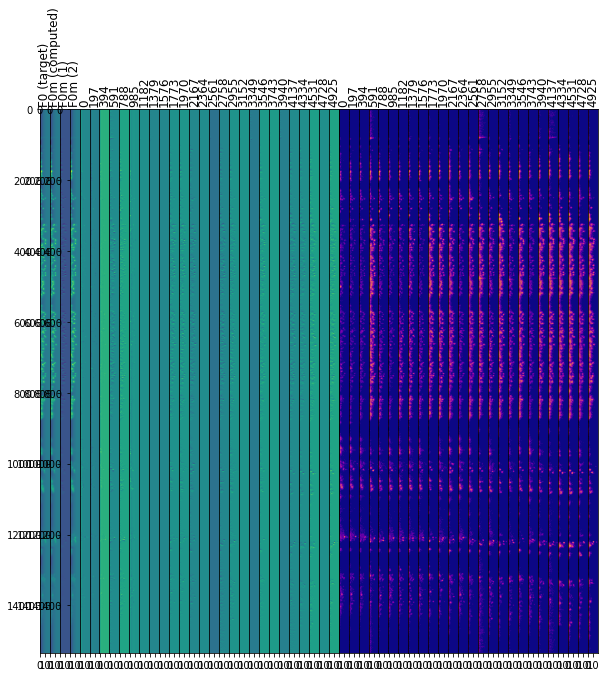

In [335]:
plot_drift_fingerprints(F_test_aligned-F_shifted_test_demeaned, F_shifted_test, F0_test , F0m_test)

In [10]:
# Manually shift
F_shifted_orig = F_input.copy()

for j in range(imin_comp_orig.shape[1]):
    block_i = np.arange(ifirst[j], ilast[j], dtype=int)
    for t in range(F_shifted_orig.shape[2]):
        F_shifted_orig[block_i,:,t] = np.roll(F_input[block_i,:,t], int(imin_comp_orig[t, j]), axis=0)


In [278]:
F_shifted_orig_demeaned = F_shifted_orig - np.mean(F_shifted_orig, axis=0, keepdims=True)

<Figure size 2160x1440 with 0 Axes>

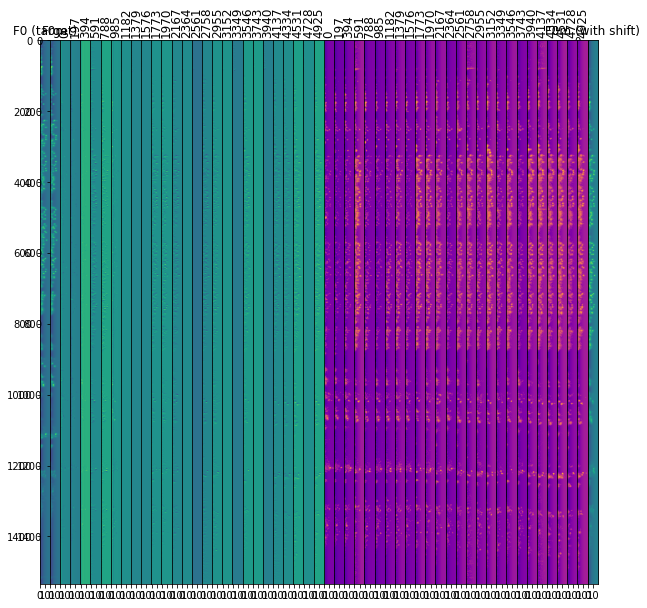

In [279]:
plot_drift_fingerprints(F_comp_aligned-F_shifted_orig_demeaned, F_shifted_orig_demeaned, F0_test , F0m_test)

<Figure size 2160x1440 with 0 Axes>

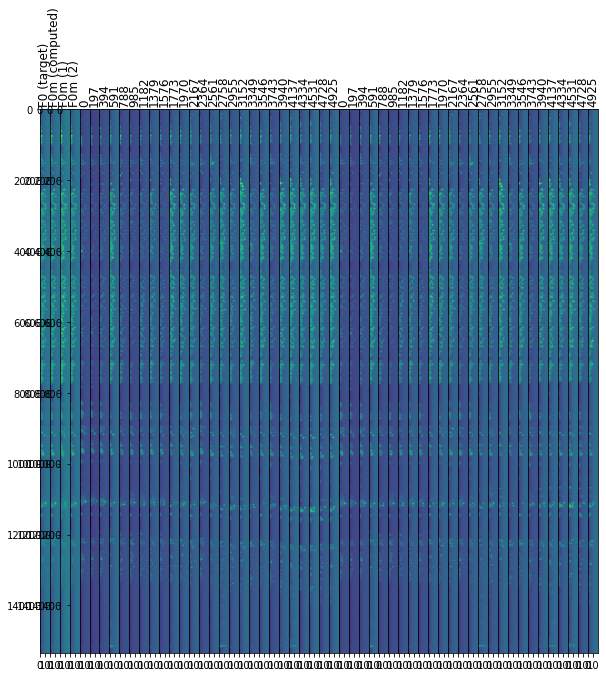

In [13]:
plt.rcParams['figure.figsize'] = [10, 10]

plot_drift_fingerprints(F_comp_aligned, F_test_aligned, F0_test , F0m_test)

<Figure size 2160x1440 with 0 Axes>

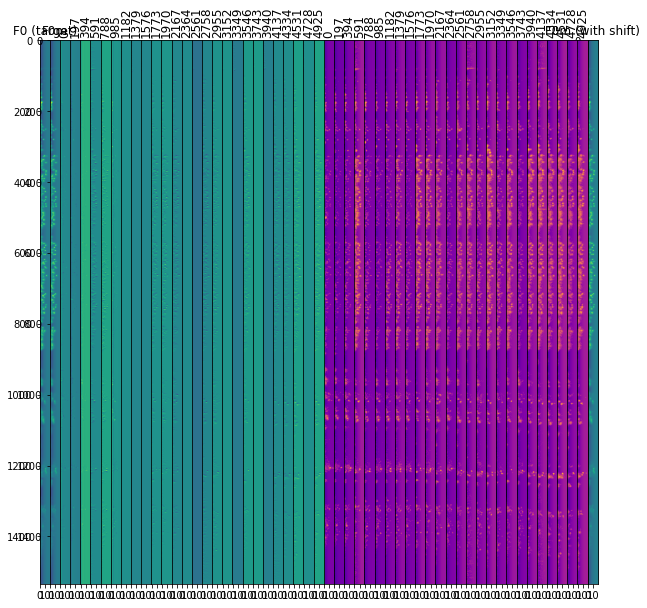

In [282]:
plot_drift_fingerprints(F_comp_aligned-F_shifted_orig_demeaned, F_shifted_orig_demeaned, F0_comp_orig , F0m_comp_orig)

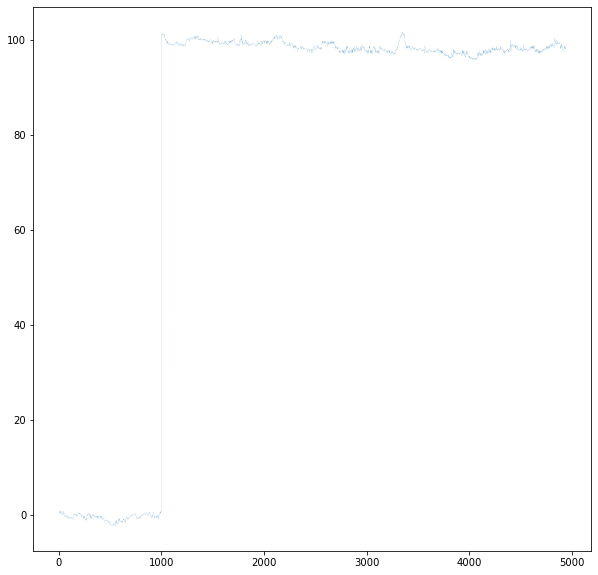

In [336]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot((imin_comp_orig), linewidth=0.1)

In [340]:
max(np.abs(imin_test - imin_comp_orig))

array([1.1])

In [353]:
imin_test.shape

(4942, 9)

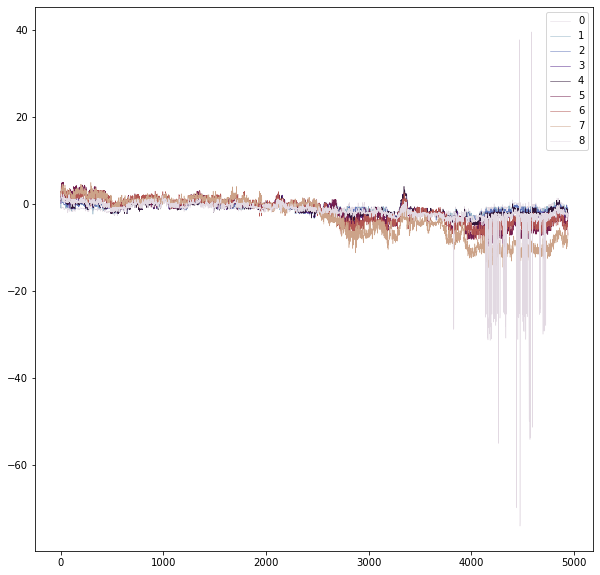

In [430]:
plt.rcParams['figure.figsize'] = [10, 10]

colors = plt.cm.twilight(np.linspace(0,1,imin_test.shape[1]))
for i in range(imin_test.shape[1]):
    plt.plot((imin_test[:,i]), linewidth=0.5, label=f'{i}', color=colors[i])
plt.legend()

In [63]:
imin_test[-1, :]

array([-0.8, -1.7, -1.9, -2.1, -2.8, -2.1, -7.1, -6.4, -2.5])

In [68]:
imin_test[4925, :]

array([-0.2, -0.8, -0.6, -1.7, -0.9, -4.2, -4.9, -8. , -1.2])

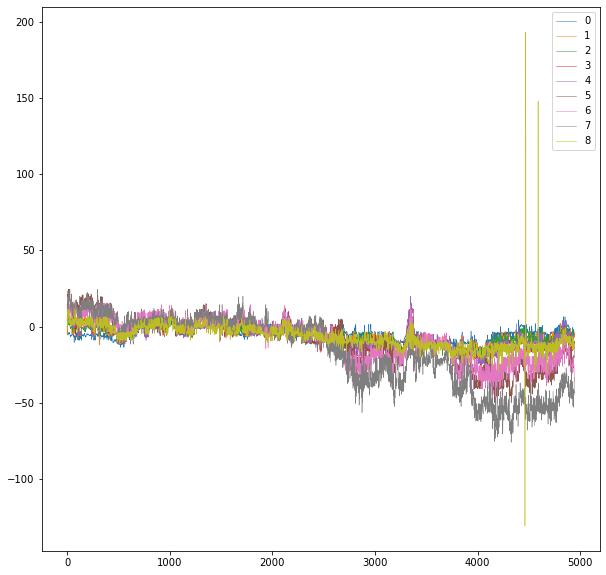

In [50]:
plt.rcParams['figure.figsize'] = [10, 10]
for i in range(imin_comp_orig.shape[1]):
    plt.plot((imin_test[:,i])*5, linewidth=0.5, label=f'{i}')
plt.legend()

In [173]:
plt.rcParams['figure.figsize'] = [3, 10]


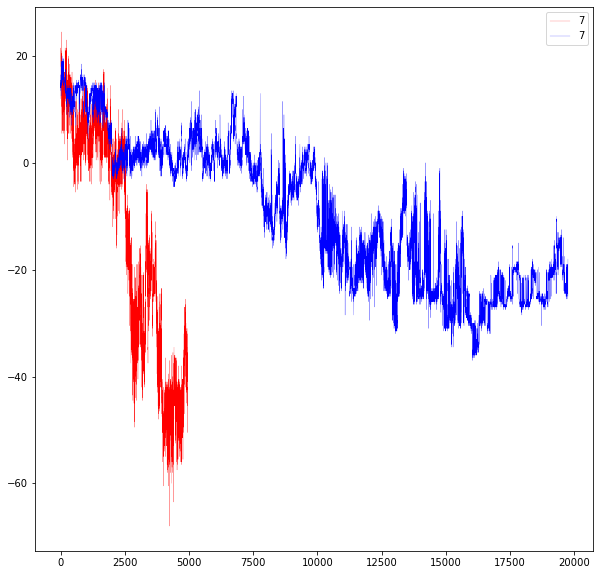

In [183]:
plt.rcParams['figure.figsize'] = [10, 10]
# for i in range(5, imin_comp_orig.shape[1]):
#     plt.plot((imin_test[:,i])*5, linewidth=0.2, color=i, linestyle='-', label=f'{i}')
#     plt.plot((imin_comp_orig[:,i])*5, linewidth=0.2, color=i, linestyle='-', label=f'{i}')
i = 7
plt.plot((imin_test[:,i])*5, linewidth=0.2, color='red', linestyle='-', label=f'{i}')
plt.plot((imin_comp_orig[:,i])*5, linewidth=0.2, color='b', linestyle='-', label=f'{i}')
plt.legend()

In [240]:
from scipy.signal import medfilt
imin_test_smooth = medfilt((imin_test - imin_test[0,:])*5, kernel_size=(5,1) )

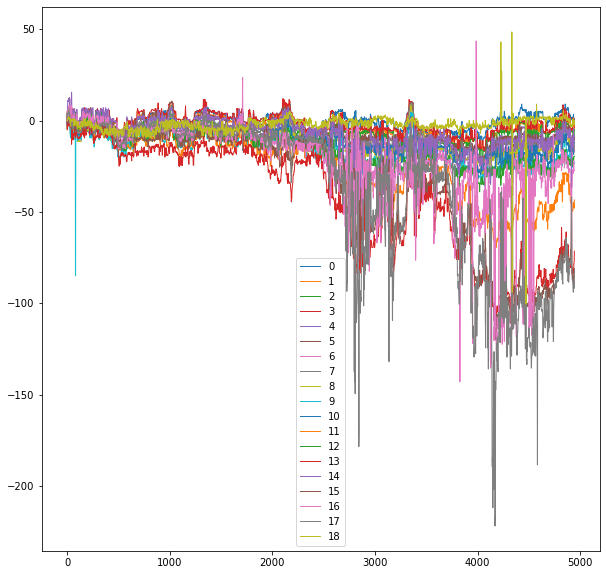

In [244]:
for i in range(imin_comp_orig.shape[1]):
#     if i!=13:
#         continue
    plt.plot((imin_test_smooth[:,i] - imin_test_smooth[0,i]), linewidth=1, label=f'{i}')
plt.legend()

In [96]:
F0 = np.zeros((1534, 20))
F1 = np.zeros((1534, 20))
import itertools
for i, j in itertools.product(range(1534), range(20)):
    if i % 50 < 5:
        F0[i, :] = np.sin(i)
    if (i + 4) % 50 < 5:
        F1[i, :] = np.sin(i)

In [97]:
F = np.zeros((1534, 20, 100))
for t in range(50):
    F[:,:,t] = F0
for t in range(50, 100):
    F[:,:,t] = F1


In [98]:
np.save('F_sim.npy', F)

In [103]:
F0_sim = np.load('F0_sim.npy')
F0m_sim = np.load('F0m_sim.npy')
imin_sim = np.load('imin_sim.npy')



In [104]:
plt.rcParams['figure.figsize'] = [3, 10]


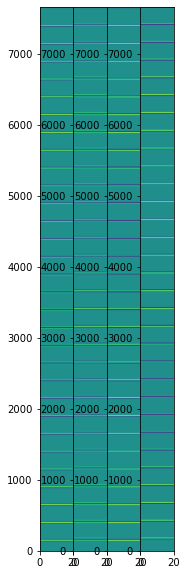

In [105]:
fig = plt.Figure()
grid = fig.add_gridspec(1, 5, wspace=0.0, hspace=0.0)

ax = plt.subplot(grid[0,0])
plt.imshow(F0_sim, aspect='auto', extent=[0, 20, 0, 7660])
ax = plt.subplot(grid[0,1])
plt.imshow(F0m_sim, aspect='auto', extent=[0, 20, 0, 7660])
ax = plt.subplot(grid[0,2])
plt.imshow(F[:,:,0], aspect='auto', extent=[0, 20, 0, 7660])
ax = plt.subplot(grid[0,3])
plt.imshow(F[:,:,-1], aspect='auto', extent=[0, 20, 0, 7660])


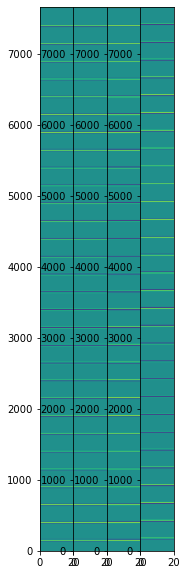

In [102]:
fig = plt.Figure()
grid = fig.add_gridspec(1, 5, wspace=0.0, hspace=0.0)

ax = plt.subplot(grid[0,0])
plt.imshow(F0_sim, aspect='auto', extent=[0, 20, 0, 7660])
ax = plt.subplot(grid[0,1])
plt.imshow(F0m_sim, aspect='auto', extent=[0, 20, 0, 7660])
ax = plt.subplot(grid[0,2])
plt.imshow(F[:,:,0], aspect='auto', extent=[0, 20, 0, 7660])
ax = plt.subplot(grid[0,3])
plt.imshow(F[:,:,-1], aspect='auto', extent=[0, 20, 0, 7660])


In [108]:
imin_sim = np.load('imin_sim.npy')


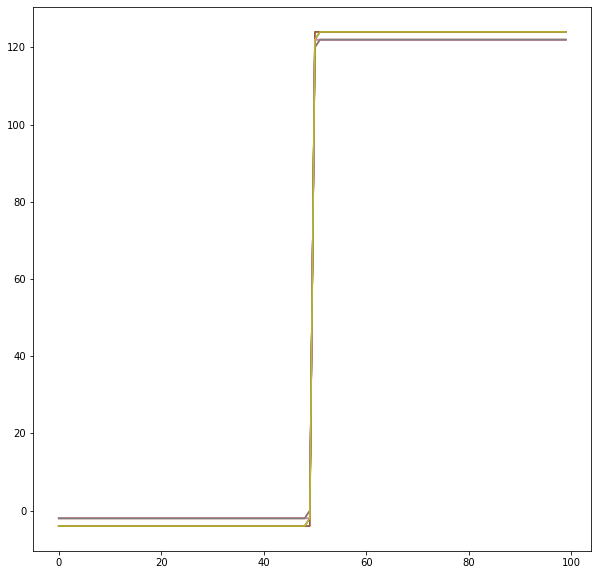

In [109]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(imin_sim*20)

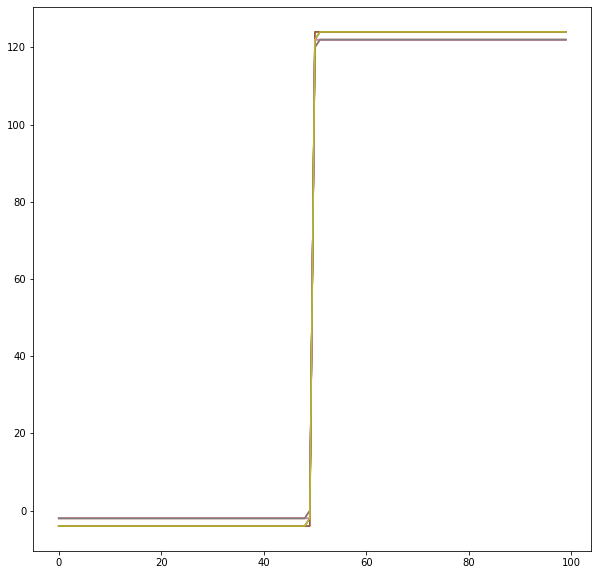

In [107]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(imin_sim*20)

In [7]:
F_orig_short = np.load('F_orig.npy')

In [6]:
pre_sorting = np.load('pre_correction_sorting.npy')
post_sorting = np.load('post_correction_sorting.npy')

In [9]:
dmax, _, Nbatches = F_orig_short.shape

In [10]:
dmax

1534

In [11]:
Nbatches

19757

In [64]:
spkTh = 8
dd = 5

def get_F(sorting):
    import tqdm
    from scipy.sparse import csr_matrix

    batch_id = sorting[:,4]
    F = np.zeros((dmax, 20, Nbatches))
    
#     for t in tqdm.tqdm(range(Nbatches)):
    for t in tqdm.tqdm(list(range(1, 10)) + list(range(10000, 10010)) + list(range(18000, 18010))):

        ix = np.where(batch_id == t)[0]

        dep = sorting[ix, 1] - 0

        amp = np.log10(np.array([min(99, x) for x in sorting[ix, 2]])) - np.log10(spkTh)

        amp = amp / (np.log10(100) - np.log10(spkTh))
        
#         M = np.zeros((dmax, 20))
#         for i in range(len(amp)):
#             M[int(np.ceil(dep[i]/dd)), int(np.ceil(amp[i] * 20 - 0.00001)) - 1] += 1
        
        I = np.array(np.ceil(dep/dd), dtype=int)
        J = np.array(np.ceil(amp * 20 + 0.00001) - 1, dtype=int)
        V = np.ones((len(amp), ))
        M = csr_matrix((V, (I, J)), shape=(dmax, 20))
        M.data = np.log2(M.data + 1)

        F[:,:,t] = M.todense()
        
    return F

In [65]:
F_pre = get_F(pre_sorting)

100%|██████████| 29/29 [00:04<00:00,  6.36it/s]


In [52]:
F_post = get_F(post_sorting)

100%|██████████| 10/10 [00:01<00:00,  5.52it/s]


In [59]:
pre_sorting[-10:-8]

array([[1.29599614e+09, 6.66216016e+03, 9.00000000e+00, 2.70000000e+01,
        1.97570000e+04, 2.66700000e+03],
       [1.29599627e+09, 6.70782422e+03, 8.00000000e+00, 2.90000000e+01,
        1.97570000e+04, 2.67900000e+03]])

In [58]:
post_sorting[-10:-8]

array([[1.29599614e+09, 6.66216016e+03, 9.00000000e+00, 2.70000000e+01,
        1.97570000e+04, 2.66700000e+03],
       [1.29599627e+09, 6.70782422e+03, 8.00000000e+00, 2.90000000e+01,
        1.97570000e+04, 2.67900000e+03]])

In [21]:
F_pre.shape

(1534, 20, 19757)

In [53]:
F_post.shape

(1534, 20, 19757)

In [54]:
np.max(F_pre[:,:,:10])

5.044394119358453

In [55]:
np.max(F_post[:,:,:10])

5.044394119358453

In [43]:
np.max(F_orig[:,:,:10])

7.05528243550119

In [67]:
idx = list(range(1, 10)) + list(range(10000, 10010)) + list(range(18000, 18010))

<Figure size 2160x1440 with 0 Axes>

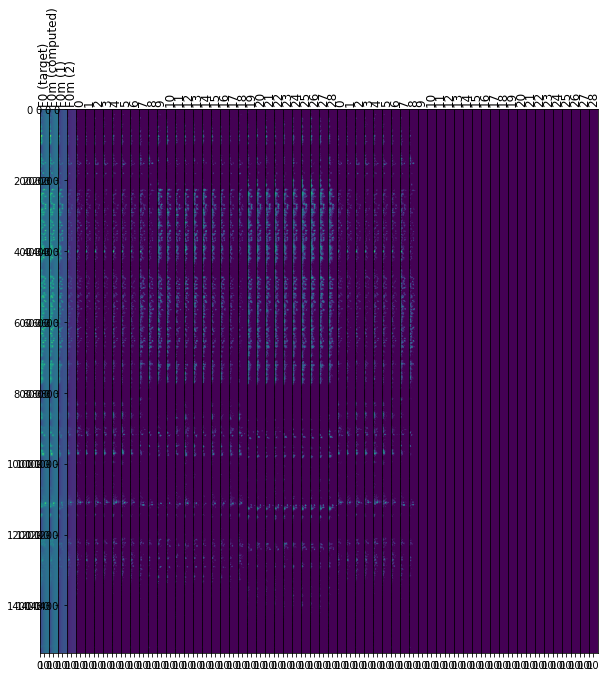

In [71]:
plt.rcParams['figure.figsize'] = [10, 10]

plot_drift_fingerprints(F_pre[:,:,idx], F_post[:,:,idx], F0_test, F0m_test, N=20)

In [ ]:
F_post = get_F(post_sortingk)

In [79]:
pre_sorting.shape

(100816473, 6)

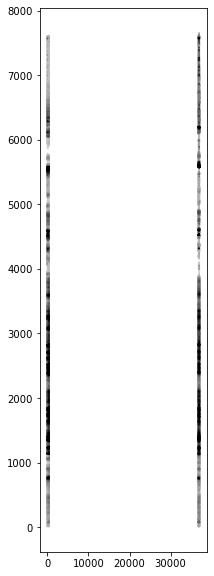

In [81]:
idx = list(range(1000000)) + list(range(80000000, 81000000))
st = pre_sorting[idx]
sf = 30000

fig, ax = plt.subplots()
st_shift = st[:,1]
for j in range(100):
    ix = np.where(st[:, 2]==j)[0]
    plt.scatter(
        st[ix, 0]/sf,
        st_shift[ix],
        s=0.05,
        c=max(0, 1-j/40) * np.ones((len(ix),)),
        cmap='gray', vmin=0,  vmax=1,
    )